In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from google.colab import files

In [25]:
uploaded = files.upload()

Saving links.csv to links (1).csv
Saving movies.csv to movies (1).csv
Saving ratings.csv to ratings (1).csv
Saving tags.csv to tags (1).csv


# *#1 Carregar e preparar os dados*

In [33]:
# Carregar os arquivos CSV
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [34]:
# Exibir amostra dos dados
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [50]:
# Realizar as junções (inner join com movieId como chave primária)

# 1. Junção de movies e ratings
movies_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

In [51]:
# 2. Junção com tags
movies_ratings_tags = pd.merge(movies_ratings, tags, on='movieId', how='left')

# 3. Junção final com links
full_data = pd.merge(movies_ratings_tags, links, on='movieId', how='left')

# Exibir amostra do dataset completo
print(full_data.head())

   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId_x  rating  timestamp_x  userId_y    tag   timestamp_y  imdbId  \
0         1     4.0    964982703     336.0  pixar  1.139046e+09  114709   
1         1     4.0    964982703     474.0  pixar  1.137207e+09  114709   
2         1     4.0    964982703     567.0    fun  1.525286e+09  114709   
3         5     4.0    847434962     336.0  pixar  1.139046e+09  114709   
4         5     4.0    847434962     474.0  pixar  1.137207e+09  114709   

   tmdbId  
0   862.0  
1   862.0  
2   862.0  
3   862.0  
4   862.0  


# *#2. Efetue a criação das seguintes visualizações de gráficos:*

In [71]:
# Pré-processamento para unir os datasets e facilitar as análises
data = pd.merge(ratings, movies, on='movieId', how='inner')
sns.set(style='whitegrid')

<ipython-input-73-0cb27e89fd0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='muted')


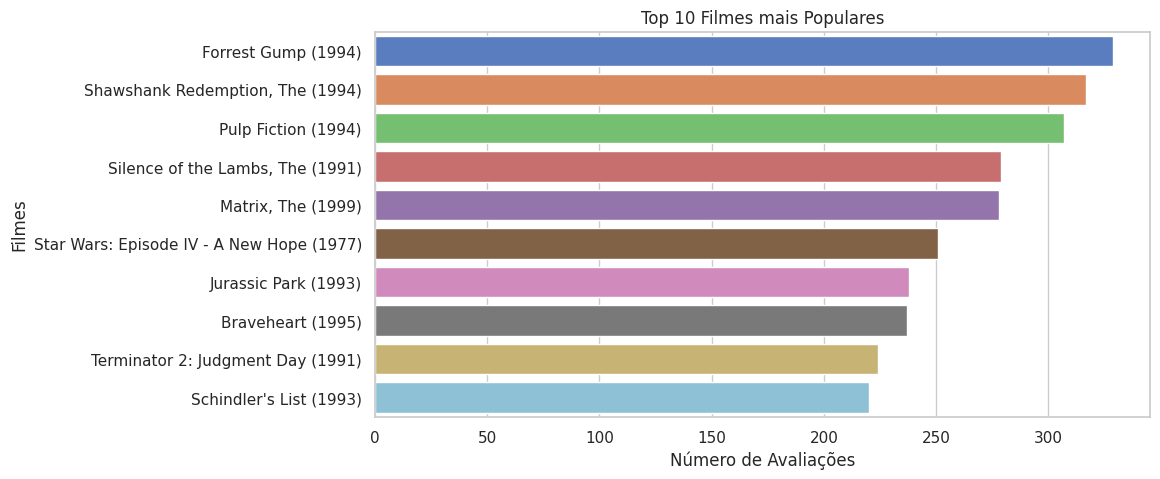

In [73]:
# ------------------ a) Gráfico de barras:Mostre o número de avaliações dos 10 filmes mais populares.------------------
top_movies = data['title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='muted')
plt.xlabel('Número de Avaliações')
plt.ylabel('Filmes')
plt.title('Top 10 Filmes mais Populares')
plt.show()

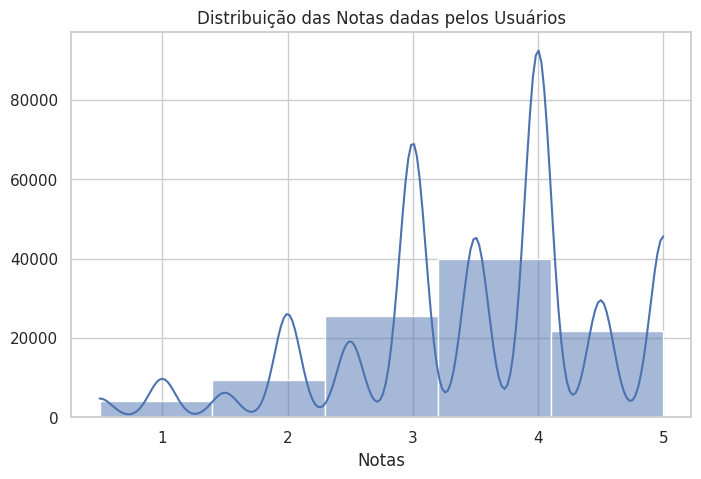

In [78]:
# ------------------ b) Histograma: exiba a distribuição das notas dadas pelos usuários.------------------
plt.figure(figsize=(8, 5))
sns.histplot(data['rating'], bins=5, kde=True)
plt.xlabel('Notas')
plt.ylabel('')
plt.title('Distribuição das Notas dadas pelos Usuários')
plt.show()

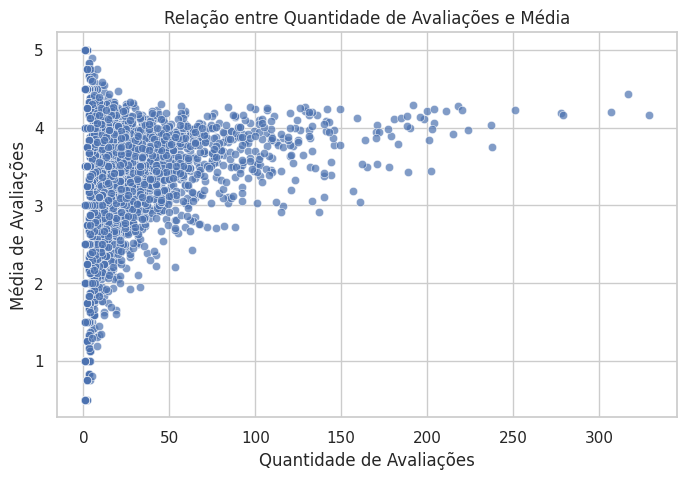

In [80]:
# ------ c) Gráfico de dispersão (scatter plot): visualize a relação entre quantidade de avaliações de um filme e sua média de avaliação.------------------
film_stats = data.groupby('title').agg({'rating': ['count', 'mean']})
film_stats.columns = ['count', 'mean']

plt.figure(figsize=(8, 5))
sns.scatterplot(x='count', y='mean', data=film_stats, alpha=0.7)
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Média de Avaliações')
plt.title('Relação entre Quantidade de Avaliações e Média')
plt.show()

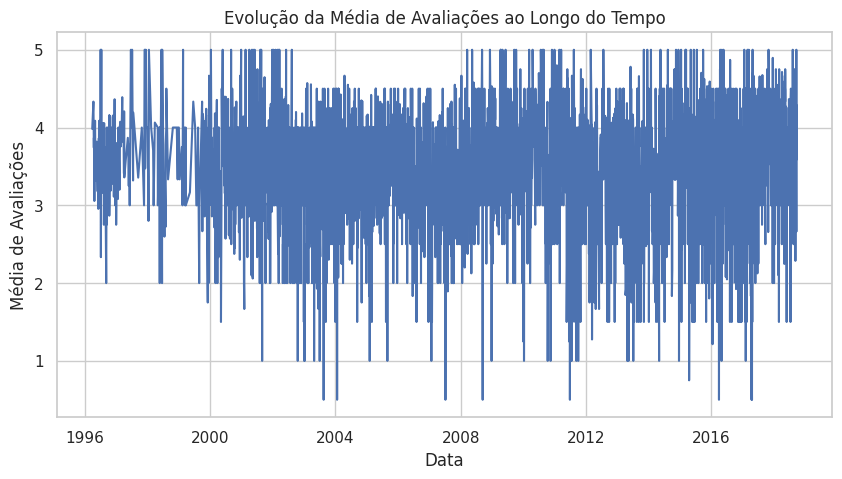

In [86]:
# ----------- d) Gráfico de linha: visualize a evolução da média de avaliações ao longo do tempo.------------------
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
avg_ratings_by_date = ratings.groupby(ratings['timestamp'].dt.date)['rating'].mean()

plt.figure(figsize=(10, 5))
avg_ratings_by_date.plot(kind='line')
plt.xlabel('Data')
plt.ylabel('Média de Avaliações')
plt.title('Evolução da Média de Avaliações ao Longo do Tempo')
plt.show()

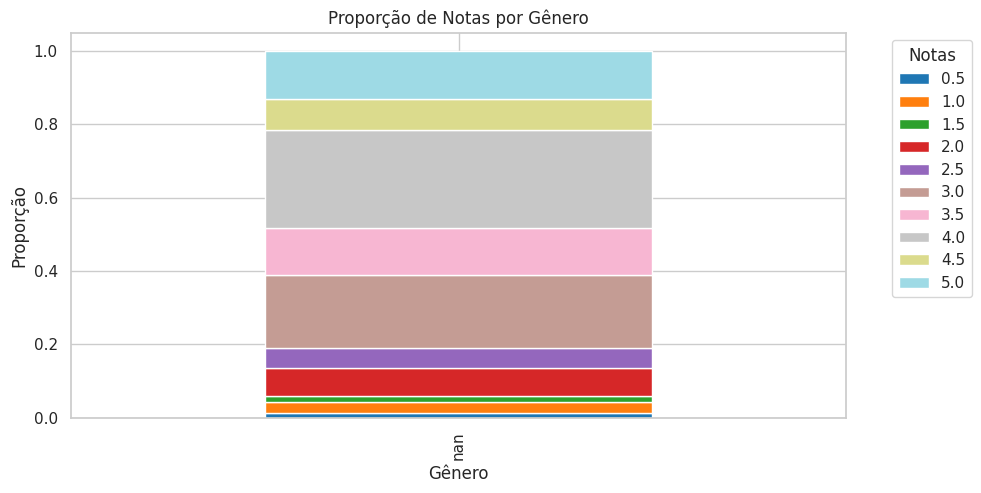

In [93]:
# ------------e) Gráfico de barras empilhadas: exiba a proporção de notas (de 1 a 5) por gênero. ------------------
data['genres'] = data['genres'].astype(str).str.split('|')
data_exploded = data.explode('genres')
ratings_by_genre = data_exploded.pivot_table(
    index='genres', columns='rating', aggfunc='size', fill_value=0
)

ratings_by_genre = ratings_by_genre.div(ratings_by_genre.sum(axis=1), axis=0)

ratings_by_genre.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='tab20')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.title('Proporção de Notas por Gênero')
plt.legend(title='Notas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()